# MAS DSE 200: Homework 3 - Exploratory Data Analysis

#### Tasks: 

- Introduction to Matplotlib.  
  
- Submission on Gradescope:
  - Submit this Jupyter notebook to "Homework 3"

#### Due date: Monday 11/01/2021 at 11:59 PM PST

---

Remember: when in doubt, read the documentation first.

Python - https://docs.python.org/3/

NumPy - https://numpy.org/doc/stable/

pandas - https://pandas.pydata.org/docs/

matplotlib - https://matplotlib.org/stable/contents.html

seaborn - https://seaborn.pydata.org/api.html

## Instructions

* You don’t need to explain your approach (unless specified) so please be concise in your submission. 
* To obtain full marks for a question, both the answer and the code should be correct. 
* Completely wrong (or missing) code with correct answer will result in zero marks.

# Author: Matthew Stickle

### Imports

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn

### Preliminaries

Load the cars data into a Pandas DataFrame called cars_df.

In [2]:
cars_df = pd.read_csv('cars.csv')

In [3]:
len(cars_df)

5076

In [4]:
cars_df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


### 1. Warm up - 1 point

1.1 What is the number of unique car engine types (`Engine Information.Engine Type`)? - 0.5 points

In [5]:
# YOUR CODE HERE
cars_df['Engine Information.Engine Type'].nunique()

535

1.2 What is the number of unique entries in the dataset when jointly looking at `Engine Information.Engine Type`, `Engine Information.Transmission` AND `Engine Information.Driveline`? Note that this should be greater than the value obtained before - 0.5 points

In [6]:
# YOUR CODE HERE
# cars_df.groupby(['Engine Information.Engine Type', 'Engine Information.Transmission', 'Engine Information.Driveline']).nunique()
q = cars_df.value_counts(subset=['Engine Information.Engine Type', 'Engine Information.Transmission', 'Engine Information.Driveline'])
q.shape[0]

1011

### 2. Distribution of data - 3 points
2.1 Plot a distribution(histogram) of Highway fuel economy(`Fuel Information.Highway mpg`). Overlay this plot with a density plot of the same quantity - 1.5 points

Tasks:
1. Each value must have its own bin. Hint - Use `data.max - data.min` to get the number of bins
2. Each bar of the histogram should be blue and separated by black edge color
3. The overlaying density line should be orange

Hint 1 - Pass `density=True` to matplotlib's [`hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function to convert counts to probability densities. This makes it easy to overlay on a density plot

Hint 2 - Seaborn is built on top of matplotlib and can be combined with a matplotlib figure. Check [`sns.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

NOTE:
* Any solution is accepted as long as it follows the above mentioned points.
* The resulting plot will be heavily skewed due to an outlier

<AxesSubplot:xlabel='Fuel Information.Highway mpg', ylabel='Density'>

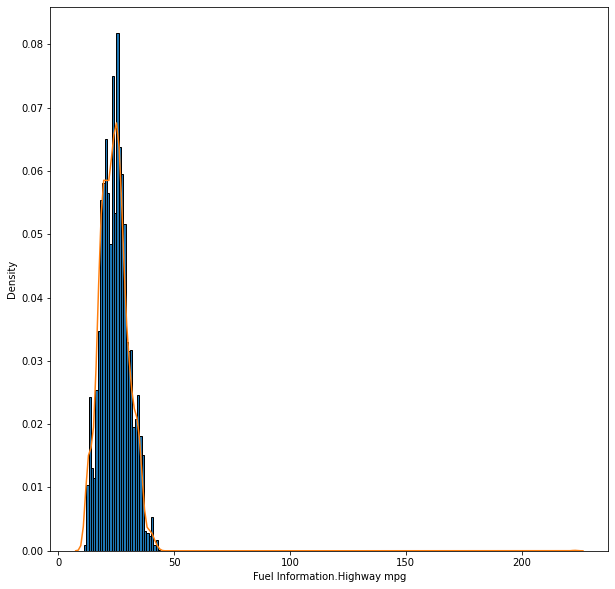

In [7]:
# YOUR CODE HERE
highway_range = cars_df['Fuel Information.Highway mpg'].max() - cars_df['Fuel Information.Highway mpg'].min()
plt.figure(figsize=(10,10))
plt.hist(cars_df['Fuel Information.Highway mpg'], bins=highway_range, density=True, ec='black')
seaborn.kdeplot(cars_df['Fuel Information.Highway mpg'])

2.2 You may notice that the previous graph is heavily skewed. This is due to an outlier(due to an error) in the data. Remove this outlier and repeat (a) - 0.5 points

The plot should look something like [this](https://i.stack.imgur.com/Qfc12.png) and should not look very skewed

NOTE - Any solution is accepted

<AxesSubplot:xlabel='Fuel Information.Highway mpg', ylabel='Density'>

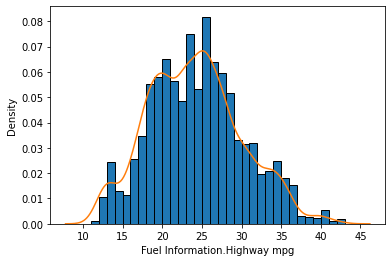

In [8]:
# c_clean = cars_df['Fuel Information.Highway mpg'].drop(cars_df['Fuel Information.Highway mpg'].idxmax())
c_clean = cars_df.drop(cars_df['Fuel Information.Highway mpg'].idxmax())
highway_range = c_clean['Fuel Information.Highway mpg'].max() - c_clean['Fuel Information.Highway mpg'].min()
plt.figure()
plt.hist(c_clean['Fuel Information.Highway mpg'], bins=highway_range, density=True, ec='black')
seaborn.kdeplot(c_clean['Fuel Information.Highway mpg'])

2.3 Repeate the same for city fuel economy(`Fuel Information.City mpg`) - 0.5 point

(Not graded) Is this plot similar to the previous one? Approximately, how much is city fuel economy lower compared to highway fuel economy?

<AxesSubplot:xlabel='Fuel Information.City mpg', ylabel='Density'>

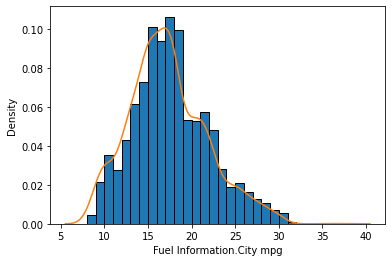

In [9]:
# YOUR CODE HERE
# '''
# The distributions are not that similar.
# The city's histogram most frequent bin is around 17mpg while freeway is around 25mpg.
# City's distrubtion starts before 10mpg while freeway's distribution starts after 10.
# There is also a more rapid decline for city's distrubtion with a majority falling behind 30mpg. The same is not true for Freeway.
# Both distributions also have a different magnitude on the y-axis (0.1 for city vs 0.08 for freeway) which drives home the difference between the two even more.
# '''
city_range = cars_df['Fuel Information.City mpg'].max() - cars_df['Fuel Information.City mpg'].min()
plt.figure()
plt.hist(cars_df['Fuel Information.City mpg'], bins=city_range, density=True, ec='black')
seaborn.kdeplot(cars_df['Fuel Information.City mpg'])
# from scipy.stats import ttest_ind
# ttest_ind(c_clean['Fuel Information.Highway mpg'], c_clean['Fuel Information.City mpg'])
# ttest_ind(cars_df['Fuel Information.Highway mpg'], cars_df['Fuel Information.City mpg'])

2.4 Repeat the same for Engine Horsepower(`Engine Information.Engine Statistics.Horsepower`) - 0.5 points

Note:

1. Use appropriate `bins`, since the range of horsepower is much higher than fuel economy. Experiment with different bin sizes from **25** to **50** 
2. Experiment with different colors from 1 (a)


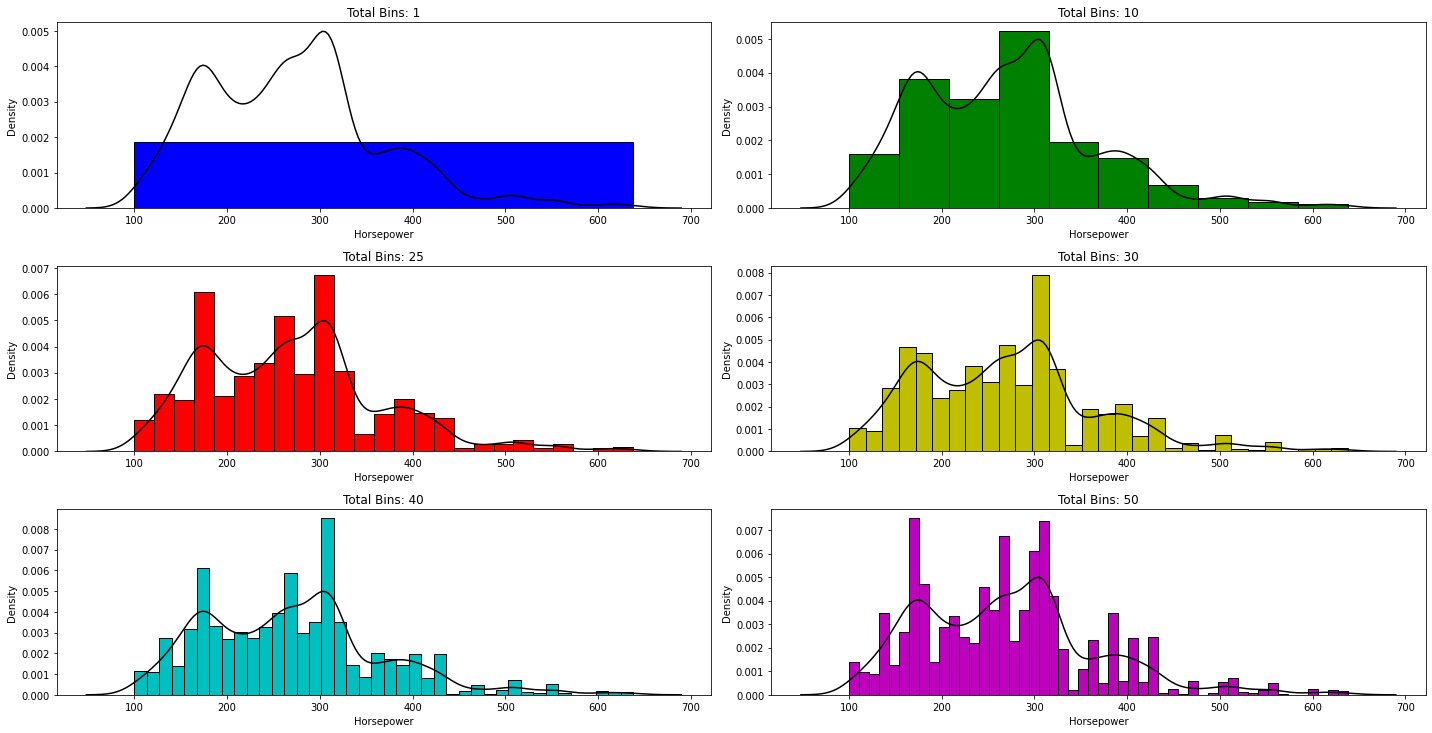

In [10]:
# YOUR CODE HERE
'''
1 bin looses all important information about the distribution of horsepower.
The 10 bin plot seems to follow the KDE pretty well.
Bin counts between 25-50 have a finer resolution than the bin count of 10, but they do not follow the trace of the KDE as well as the bin count of 10.
Therefore, in my opinion, 10 total bins is a nice trade off between resolution and noise of the data while still being able to follow the KDE trace fairly well.
'''
colors = ['b', 'g', 'r', 'y', 'c', 'm']
plt.figure(figsize=(20,20))
bin_list = [1, 10, 25, 30, 40, 50]
for i, bin_c in enumerate(bin_list):
    
    plt.subplot(6, 2, i + 1)
    plt.hist(cars_df['Engine Information.Engine Statistics.Horsepower'], bins=bin_c, density=True, ec='black', color=colors[i])
    seaborn.kdeplot(cars_df['Engine Information.Engine Statistics.Horsepower'], color='k')
    plt.title(f"Total Bins: {bin_c}")
    plt.xlabel('Horsepower')
plt.tight_layout()

### 3. Correlation - 3 points

3.1 Plot a scatter plot, overlayed with a *line of best fit* plot, of engine horsepower vs highway fuel economy - 2 point

* The x-axis is engine power
* The y-axis is fuel economy
* Lable the axes appropriately
* Add an appropriate title
* Use [`np.polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) or any other method/library to plot the line of best fit

* Hint - The resulting plot should look similar to [this](https://en.wikipedia.org/wiki/Simple_linear_regression#/media/File:Okuns_law_quarterly_differences.svg)

Reference  -[`Simple linear regression`](https://en.wikipedia.org/wiki/Simple_linear_regression)

You do not have to worry about the details of linear regression here. You can use any library function to do it for you

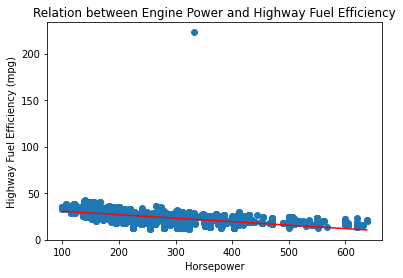

In [11]:
# YOUR CODE HERE
plt.figure()
plt.scatter(cars_df['Engine Information.Engine Statistics.Horsepower'], cars_df['Fuel Information.Highway mpg'])
plt.xlabel('Horsepower')
plt.ylabel('Highway Fuel Efficiency (mpg)')
plt.title('Relation between Engine Power and Highway Fuel Efficiency')

x_min = cars_df['Engine Information.Engine Statistics.Horsepower'].min()
x_max = cars_df['Engine Information.Engine Statistics.Horsepower'].max()
coeff = np.polyfit(cars_df['Engine Information.Engine Statistics.Horsepower'], cars_df['Fuel Information.Highway mpg'], 1)
line_eq = np.poly1d(coeff)
x = np.linspace(x_min, x_max, (x_max - x_min))
plt.plot(x, line_eq(x), color='r')

3.2 You might notice in the previous plot that there is an outlier(porbably an error) in fuel economy. Repate the plot after removing the outlier point - 0.5 points

(Optional)(Subjective) What can you tell about the correlation between engine horsepower and fuel economy?

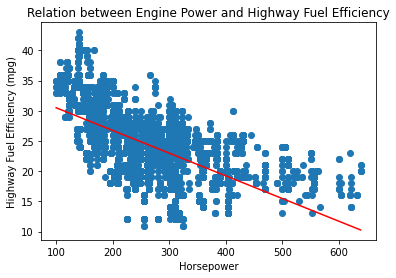

In [12]:
# YOUR CODE HERE
'''
There does seem to be a negative correlation between horsepower and highway fuel efficiency.
However, there is a slight curve in the data indiciating that there might be a non-linear relationship between thet wo.
'''
plt.figure()
plt.scatter(c_clean['Engine Information.Engine Statistics.Horsepower'], c_clean['Fuel Information.Highway mpg'])
plt.xlabel('Horsepower')
plt.ylabel('Highway Fuel Efficiency (mpg)')
plt.title('Relation between Engine Power and Highway Fuel Efficiency')

x_min = c_clean['Engine Information.Engine Statistics.Horsepower'].min()
x_max = c_clean['Engine Information.Engine Statistics.Horsepower'].max()
coeff = np.polyfit(c_clean['Engine Information.Engine Statistics.Horsepower'], c_clean['Fuel Information.Highway mpg'], 1)
line_eq = np.poly1d(coeff)
x = np.linspace(x_min, x_max, (x_max - x_min))
plt.plot(x, line_eq(x), color='r')

3.3 Repeat the same for engine horsepower(x-axis) and engine torque(y-axis) - 0.5 point

(Optional)(Subjective) What can you tell about the correlation between engine horsepower and engine torque?

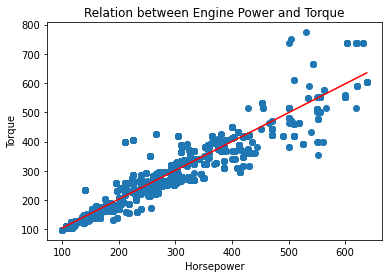

In [13]:
# YOUR CODE HERE
'''
There is a positive correlation between horse power and torque.
'''
plt.figure()
plt.scatter(cars_df['Engine Information.Engine Statistics.Horsepower'], cars_df['Engine Information.Engine Statistics.Torque'])
plt.xlabel('Horsepower')
plt.ylabel('Torque')
plt.title('Relation between Engine Power and Torque')

x_min = cars_df['Engine Information.Engine Statistics.Horsepower'].min()
x_max = cars_df['Engine Information.Engine Statistics.Horsepower'].max()
coeff = np.polyfit(cars_df['Engine Information.Engine Statistics.Horsepower'], cars_df['Engine Information.Engine Statistics.Torque'], 1)
line_eq = np.poly1d(coeff)
x = np.linspace(x_min, x_max, (x_max - x_min))
plt.plot(x, line_eq(x), color='r')

### 4. Subplots - 2 points

* Create a 2 x 2 subplots of the following plots. Make sure the entire plot is sufficiently large(Hint - check [`rcParams`](https://matplotlib.org/stable/tutorials/introductory/customizing.html) )
    * Box plot of highway fuel economiy(Note the extreme outlier. You may optionally remove it before plotting it. Both are acceptable solutions)
    * Pie chart of Model year(`Identification.Year`)
    * Scatter-plot of Highway fuel economy(`Fuel Information.Highway mpg`) vs City fuel economy(`Fuel Information.City mpg`) with the outlier removed
    * Bar plot of count of each transmission type(`Engine Information.Transmission`)
* The order of the plots does not matter

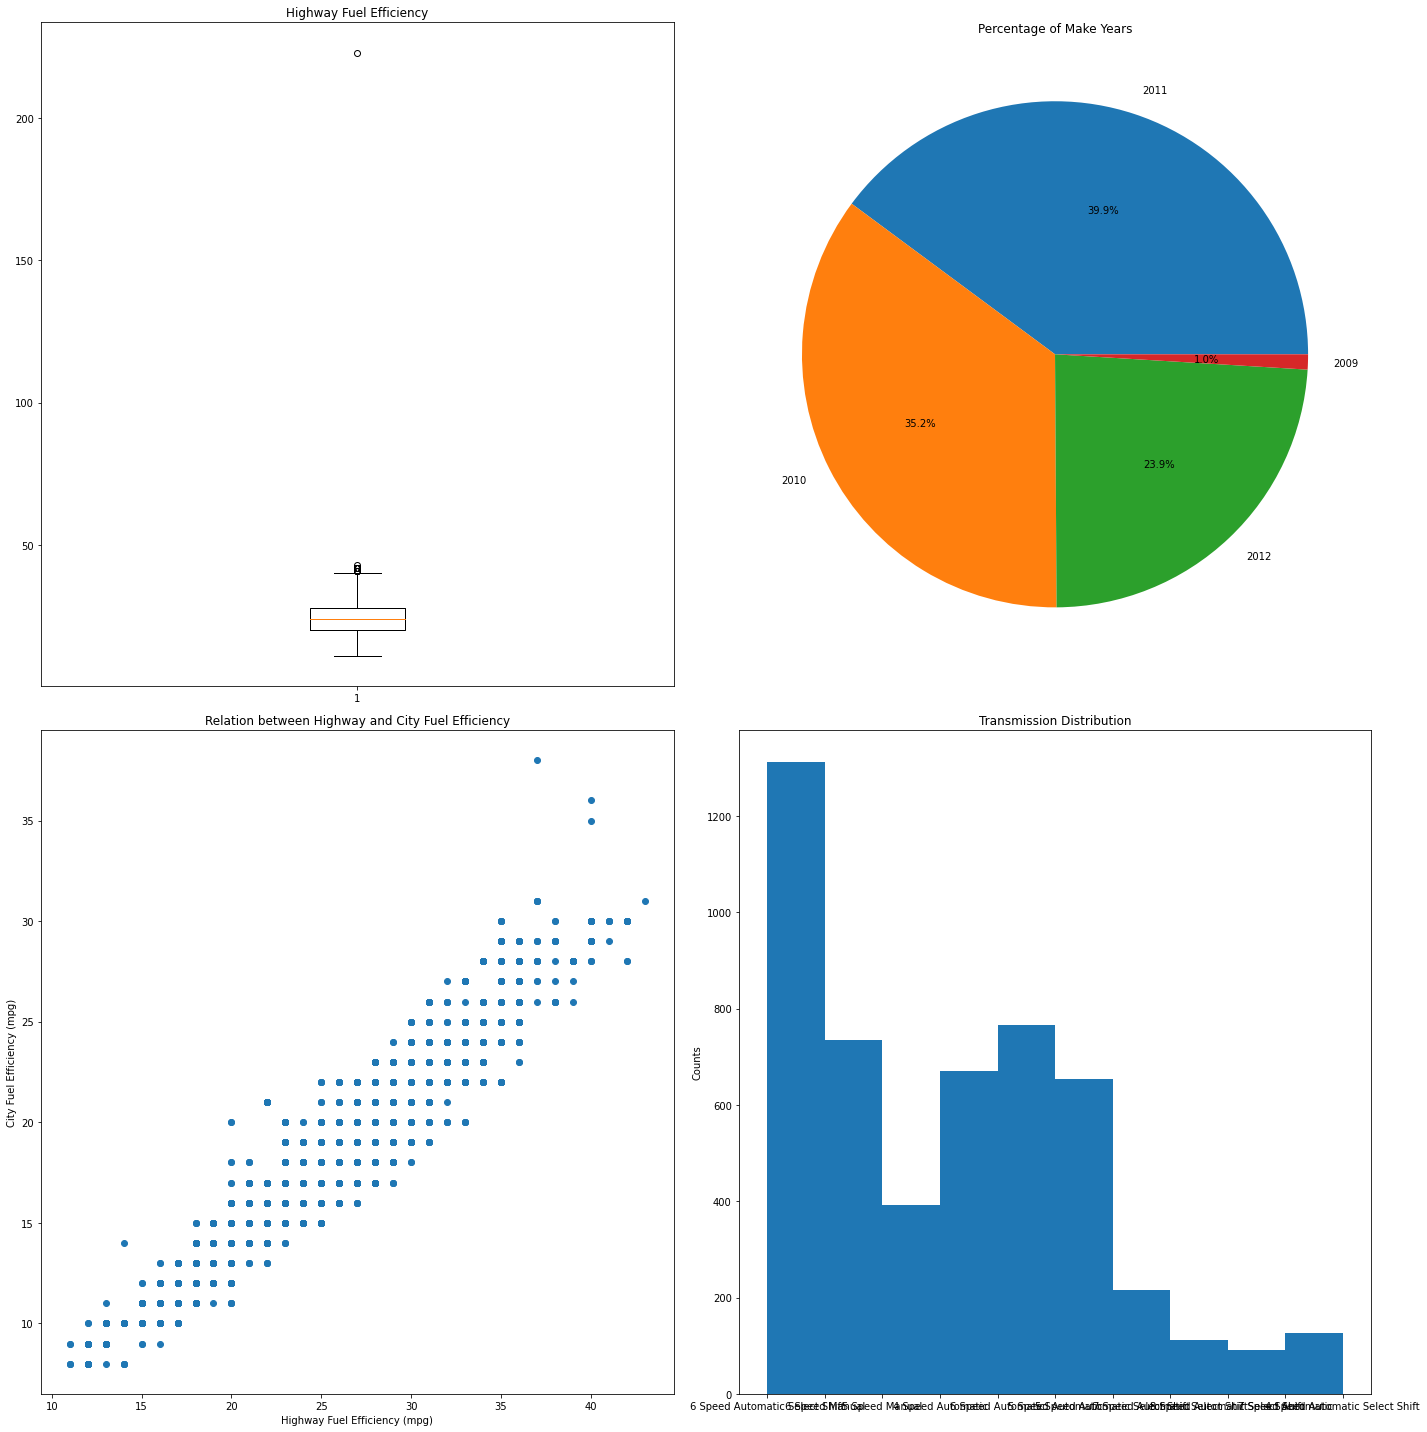

In [14]:
# YOUR CODE HERE
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
plt.boxplot(cars_df['Fuel Information.Highway mpg'])
plt.title('Highway Fuel Efficiency')
plt.subplot(2, 2, 2)
plt.title('Percentage of Make Years')
year_counts = cars_df['Identification.Year'].value_counts()
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%')
plt.subplot(2, 2, 3)
plt.scatter(c_clean['Fuel Information.Highway mpg'], c_clean['Fuel Information.City mpg'])
plt.xlabel('Highway Fuel Efficiency (mpg)')
plt.ylabel('City Fuel Efficiency (mpg)')
plt.title('Relation between Highway and City Fuel Efficiency')
plt.subplot(2, 2, 4)
plt.hist(cars_df['Engine Information.Transmission'])
plt.ylabel('Counts')
plt.title('Transmission Distribution')
plt.tight_layout()

### 5. Heatmap - 5 points

* Create a heatmap of "Make of the car"(`Identification.Make`) vs "year+transmission type" (`Engine Information.Transmission` + `Identification.Year`) for "number of models for that year". This will show the the number of cars of each transmission type, produced by each of the top manufactures for each of the years
    * Pick the top 8 car manufactutres (`Identification.Make`) by number of cars produced - x-axis
    * Use a combination of model year and transmission type on y-axis.
        * All entries with "Automatic" in transmission should be renamed to "AT" and "Manual" to "MT"
        * Each entry on the Y-axis should look like "2009-AT" or "2009AT" representing the model year 2009 and Automatic transmission type
        * This will require some pre-processing with pandas before plotting the heatmap
    * Create a heatmap where each data point shows the number of such models created
    * The heatmap should be of size 8x8, with top 8 manufactutres on x-axis and 8 combinations(4 years and 2 transmission types) of year-transmission on y-axis

The output should look something like this:


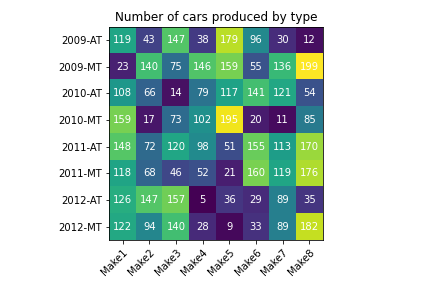

You can make inference such as: "Make 1" produced 118 cars with Manual Transmission "MT" in the year "2011"

<AxesSubplot:xlabel='Identification.Make', ylabel='trans_year'>

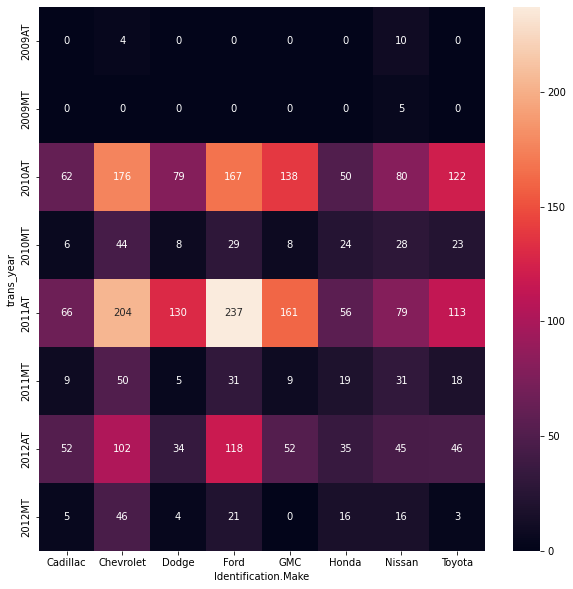

In [ ]:
# YOUR CODE HERE
# Find top 8 car males
top_makes = cars_df['Identification.Make'].value_counts()
top_makes = top_makes.iloc[:8].index
# Filter cars_df to only include top 8 makes
top_makes_df = cars_df[cars_df['Identification.Make'].isin(top_makes)].copy()

# Find automatic and manual rows and set them to AT and MT
automatic_mask = top_makes_df['Engine Information.Transmission'].str.contains('Automatic', case=False)
manual_mask = top_makes_df['Engine Information.Transmission'].str.contains('Manual', case=False)
trans = top_makes_df['Engine Information.Transmission'].copy()
trans = trans.where(automatic_mask, other='MT')
trans = trans.where(manual_mask, other='AT')
# Add year and append to top 8 df
trans = top_makes_df['Identification.Year'].astype(str) + trans
top_makes_df['trans_year'] = trans

# Count unique trans_year for each make
make_counts = top_makes_df.value_counts(subset=['trans_year', 'Identification.Make'])
make_counts_df = make_counts.unstack(level=1, fill_value=0)

# Make heat map
plt.figure(figsize=(10,10))
seaborn.heatmap(make_counts_df.astype(int), annot=True, fmt="d")

### 6. Pair-plots (Seaborn) - 1 points
* Create a pair-plot of the following columns: length, width, highway fuel economy, city fuel economy, engine power, engine torque
* Which of the pairs show a positive correlation? Which of the pairs show a negative correlation? 

<Figure size 1440x1440 with 0 Axes>

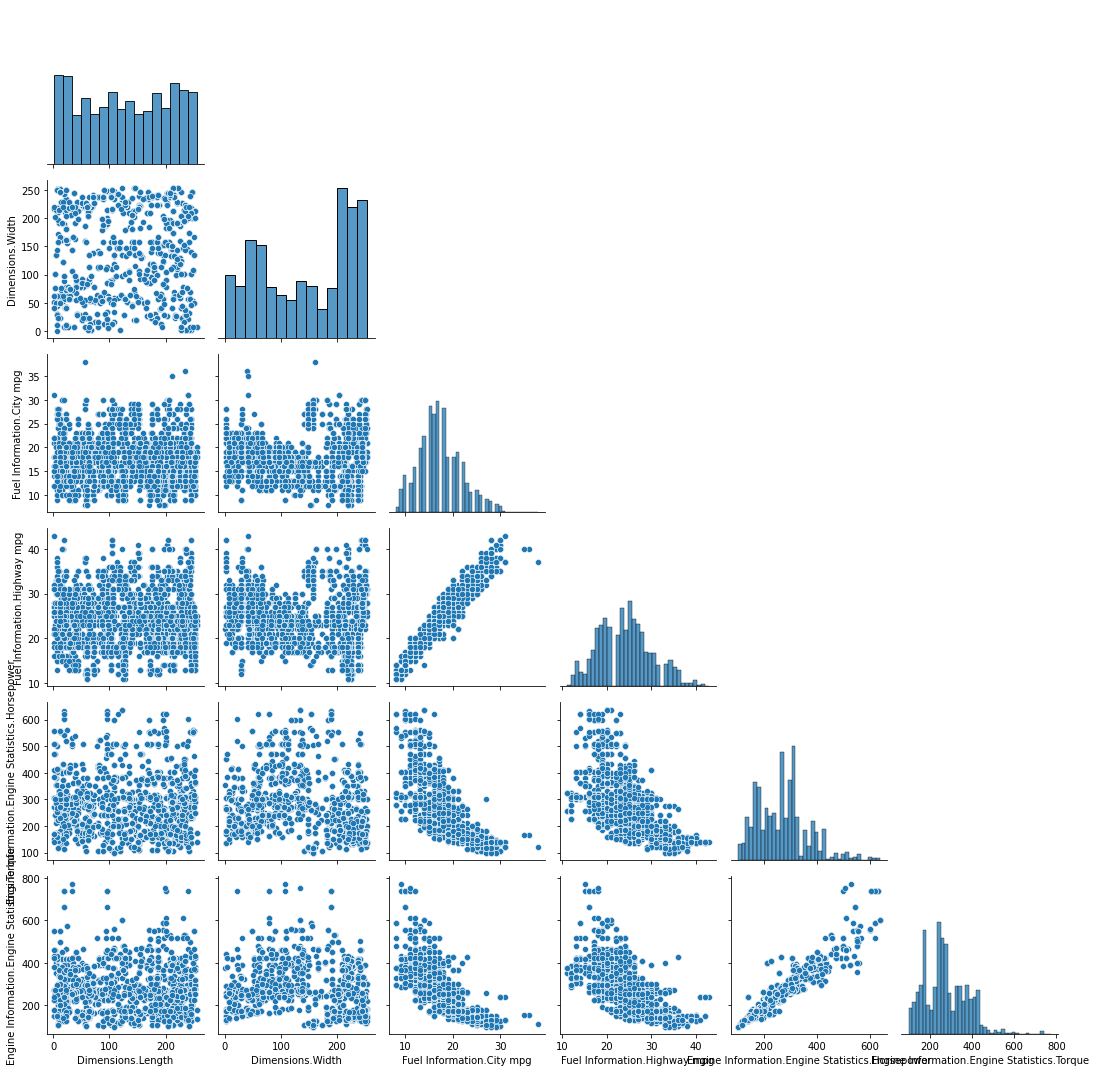

In [16]:
# YOUR CODE HERE
'''
city and highway both short hand for fuel efficiency respectfully
Positive corr: city vs highway, horsepower vs torque
negative corr: Both negative correlations have a slight curve which might be a non-linear relationship.
               city vs horsepower, city vs torque, highway vs horsepower, highway vs torque
'''
plt.figure(figsize=(20,20))
pair_vars = ['Dimensions.Length', 'Dimensions.Width', 'Fuel Information.City mpg', 'Fuel Information.Highway mpg', 
             'Engine Information.Engine Statistics.Horsepower', 'Engine Information.Engine Statistics.Torque']
seaborn.pairplot(c_clean, vars=pair_vars, corner=True,) # plotted pairplot with outlier removed to examine plots more carefully
plt.tight_layout()